In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from GetData import O3_BBH, O4_BBH
from sklearn.metrics import r2_score
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats

$N(m)=km^\alpha$

$ln(N)=\alpha[ln(m)]+ln(k)$

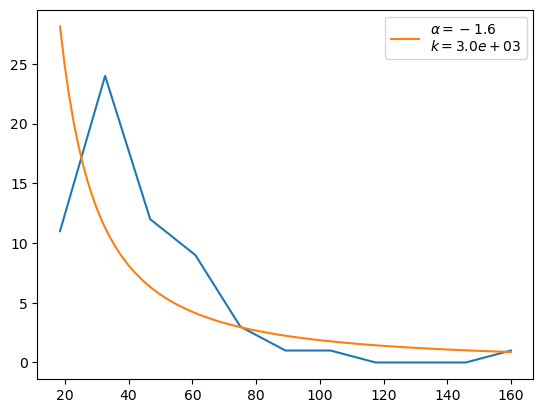

In [ ]:
bins = 11
N, m_ranges = np.histogram(O4_BBH["chirp_mass"], bins=bins)
m = (m_ranges[:-1]+m_ranges[1:])/2
alpha, lnk = np.polyfit(np.log(m[N>0]), np.log(N[N>0]), 1)
k = np.exp(lnk)
plt.plot(m, N)
x = np.linspace(min(m), max(m), 100)
plt.plot(x, k * (x ** alpha), label=f"$\\alpha={alpha:.1f}$\n$k={k:.1e}$")
plt.legend()
plt.show()

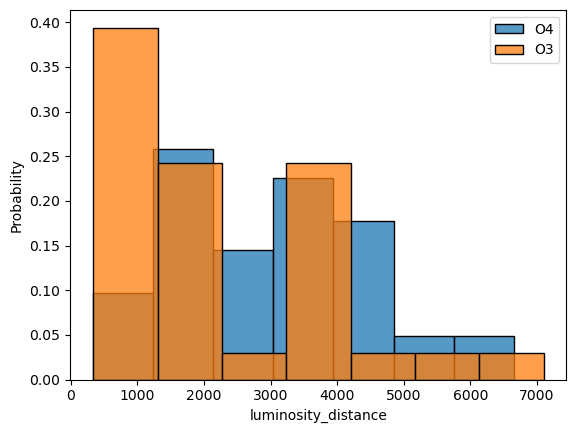

In [77]:
sns.histplot(O4_BBH, x="luminosity_distance", stat="probability", label="O4")
sns.histplot(O3_BBH, x="luminosity_distance", stat="probability", label="O3")
plt.legend()
plt.show()

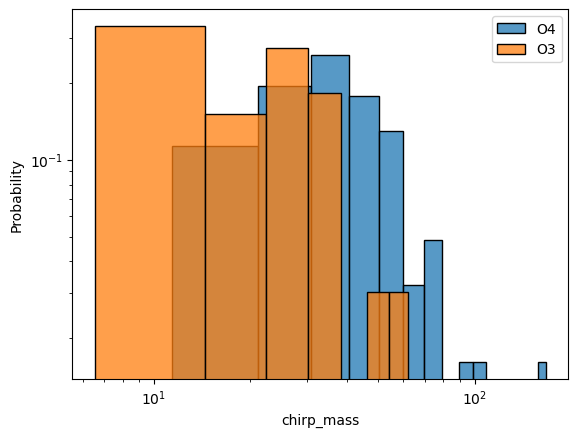

In [78]:
sns.histplot(O4_BBH, x="chirp_mass", stat="probability", label="O4")
sns.histplot(O3_BBH, x="chirp_mass", stat="probability", label="O3")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

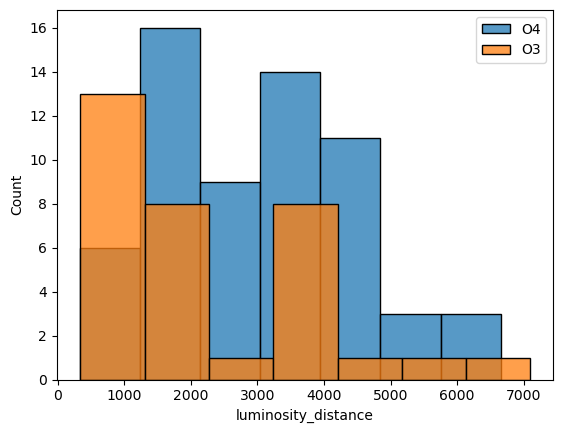

In [79]:
sns.histplot(O4_BBH, x="luminosity_distance", stat="count", label="O4")
sns.histplot(O3_BBH, x="luminosity_distance", stat="count", label="O3")
plt.legend()
plt.show()

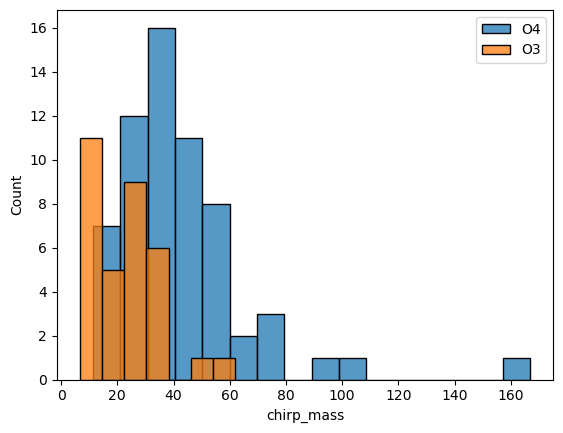

In [80]:
sns.histplot(O4_BBH, x="chirp_mass", stat="count", label="O4")
sns.histplot(O3_BBH, x="chirp_mass", stat="count", label="O3")
plt.legend()
plt.show()

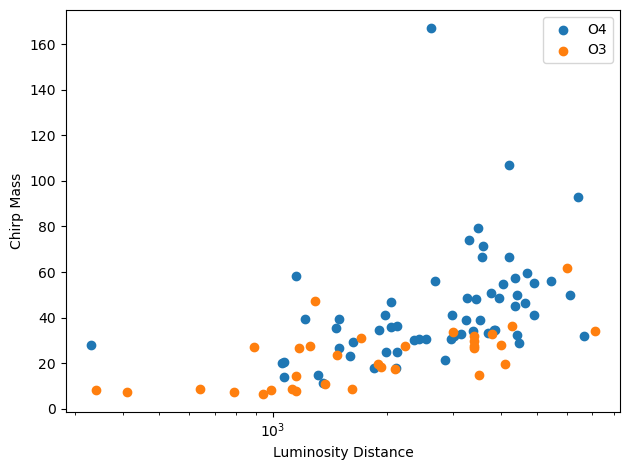

In [81]:
plt.scatter(O4_BBH["luminosity_distance"], O4_BBH["chirp_mass"], label="O4")
plt.scatter(O3_BBH["luminosity_distance"], O3_BBH["chirp_mass"], label="O3")
plt.legend()
plt.xscale("log")
plt.xlabel("Luminosity Distance")
plt.ylabel("Chirp Mass")
#plt.colorbar()
plt.tight_layout()
plt.show()

In [82]:
ld = np.copy(O4_BBH[O4_BBH['chirp_mass'] < 140]["luminosity_distance"])
ld.sort()
ld

array([ 330., 1059., 1066., 1067., 1148., 1218., 1317., 1357., 1467.,
       1491., 1491., 1594., 1623., 1849., 1905., 1978., 1986., 2047.,
       2056., 2110., 2124., 2132., 2358., 2428., 2545., 2676., 2857.,
       2965., 2966., 3010., 3139., 3230., 3260., 3292., 3390., 3447.,
       3493., 3531., 3565., 3600., 3707., 3766., 3852., 3861., 3964.,
       4060., 4216., 4221., 4353., 4364., 4425., 4425., 4468., 4647.,
       4701., 4900., 4902., 5423., 6089., 6417., 6653.])

In [83]:
m = 0.8003270810708438
b = 7.534448682703253
SNR_scale_factor = 1.6

sub_O4_BBH = O4_BBH[(O4_BBH["luminosity_distance"] < 6089) & (O4_BBH['chirp_mass'] < 140)]

predicted_luminosity_distances = m * np.log(sub_O4_BBH["chirp_mass"]) - np.log(sub_O4_BBH["snr"] * SNR_scale_factor) + b
r2 = r2_score(np.log(sub_O4_BBH["luminosity_distance"]), predicted_luminosity_distances)

def prediction_plots(color_name, color_label, cmap, bins=7):
    x = np.logspace(
        np.log10(np.min(sub_O4_BBH["luminosity_distance"])),
        np.log10(np.max(sub_O4_BBH["luminosity_distance"])),
        2
        )
    plt.plot(x, x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2))
    plt.scatter(np.exp(predicted_luminosity_distances), sub_O4_BBH["luminosity_distance"], c = sub_O4_BBH[color_name], cmap=cmap)
    plt.legend()
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(color_label, rotation=270)
    plt.ylabel("Actual Luminosity Distance (Mpc)")
    plt.xlabel("Predicted Luminosity Distance (Mpc)")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

    plt.plot(x, x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2))
    plt.scatter(np.exp(predicted_luminosity_distances), sub_O4_BBH["luminosity_distance"], c = sub_O4_BBH[color_name], cmap=cmap)
    plt.errorbar(np.exp(predicted_luminosity_distances), sub_O4_BBH["luminosity_distance"], yerr=sub_O4_BBH["luminosity_distance_error"], c="black", fmt=".", zorder=0)
    plt.legend()
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(color_label, rotation=270)
    plt.ylabel("Actual Luminosity Distance (Mpc)")
    plt.xlabel("Predicted Luminosity Distance (Mpc)")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

    plt.plot(x, np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2))
    plt.scatter(sub_O4_BBH["luminosity_distance"], np.log(sub_O4_BBH["luminosity_distance"]) - predicted_luminosity_distances, c = sub_O4_BBH[color_name], cmap=cmap)
    plt.legend()
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(color_label, rotation=270)
    plt.ylabel("Log Residuals")
    plt.xlabel("Actual Luminosity Distance (Mpc)")
    plt.xscale("log")
    plt.show()

    g = sns.JointGrid()
    g.plot_marginals(sns.histplot, kde=True, bins=bins)
    g.ax_marg_x.remove()
    residuals = np.log(sub_O4_BBH["luminosity_distance"]) - predicted_luminosity_distances
    sns.histplot(y=residuals, color="dodgerblue", kde=True, bins=bins, ax=g.ax_marg_y)
    g.ax_joint.plot(x,np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2))
    sc = g.ax_joint.scatter(sub_O4_BBH["luminosity_distance"], residuals, c=sub_O4_BBH[color_name], cmap=cmap)
    g.ax_joint.legend()
    g.ax_joint.set_ylabel("Log Residuals")
    g.ax_joint.set_xlabel("Actual Luminosity Distance (Mpc)")
    g.ax_joint.set_xscale("log")
    plt.show()

    plt.plot(x, np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2))
    plt.errorbar(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["luminosity_distance"] - np.exp(predicted_luminosity_distances), yerr=sub_O4_BBH["luminosity_distance_error"], c="black", fmt=".")
    plt.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["luminosity_distance"] - np.exp(predicted_luminosity_distances), c = sub_O4_BBH[color_name], zorder=10, cmap=cmap)
    plt.legend()
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(color_label, rotation=270)
    plt.ylabel("Residuals (Mpc)")
    plt.xlabel("Actual Luminosity Distance (Mpc)")
    plt.xscale("log")
    plt.show()

    plt.plot(x, np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2))
    plt.errorbar(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["luminosity_distance"] - np.exp(predicted_luminosity_distances), yerr=sub_O4_BBH["luminosity_distance_error"], c="black", fmt=".")
    plt.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["luminosity_distance"] - np.exp(predicted_luminosity_distances), c = sub_O4_BBH[color_name], zorder=10, cmap=cmap)
    plt.legend()
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(color_label, rotation=270)
    plt.ylabel("Residuals (Mpc)")
    plt.xlabel("Actual Luminosity Distance (Mpc)")
    #plt.xscale("log")
    plt.show()

    g = sns.JointGrid()
    g.plot_marginals(sns.histplot, kde=True, bins=bins)
    g.ax_marg_x.remove()
    residuals = sub_O4_BBH["luminosity_distance"] - np.exp(predicted_luminosity_distances)
    sns.histplot(y=residuals, color="dodgerblue", kde=True, bins=bins, ax=g.ax_marg_y)
    g.ax_joint.plot(x,np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2))
    sc = g.ax_joint.scatter(sub_O4_BBH["luminosity_distance"], residuals, c=sub_O4_BBH[color_name], cmap=cmap)
    g.ax_joint.errorbar(sub_O4_BBH["luminosity_distance"], residuals, yerr=sub_O4_BBH["luminosity_distance_error"], c="black", fmt=".", zorder=0)
    g.ax_joint.legend()
    g.ax_joint.set_ylabel("Residuals (Mpc)")
    g.ax_joint.set_xlabel("Actual Luminosity Distance (Mpc)")
    g.ax_joint.set_xscale("log")
    plt.show()

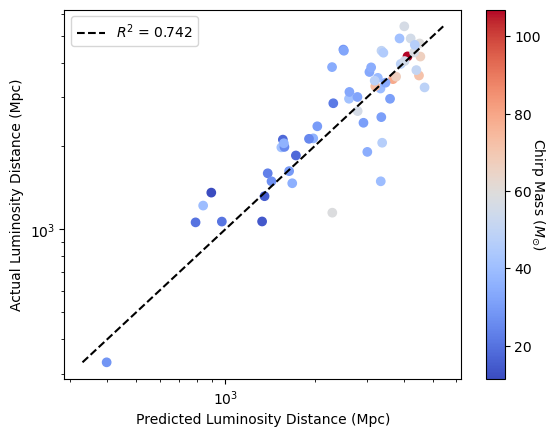

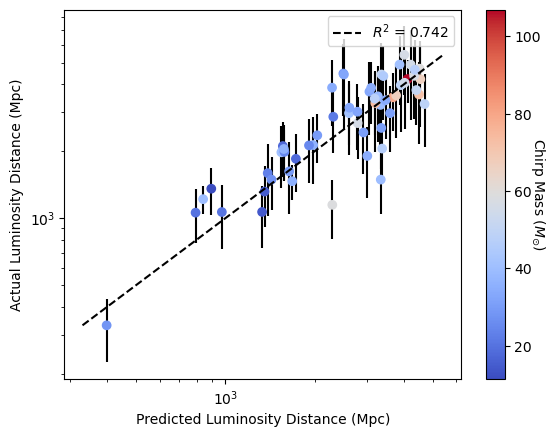

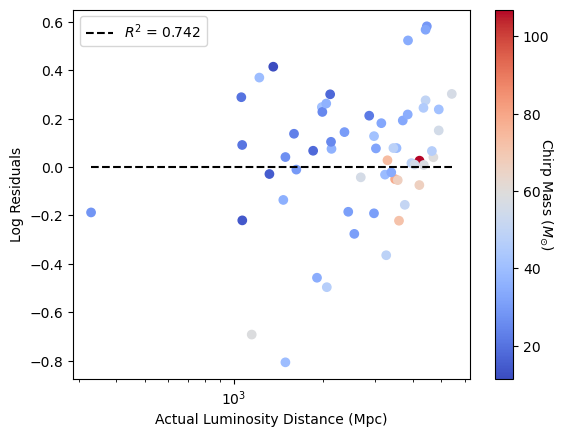

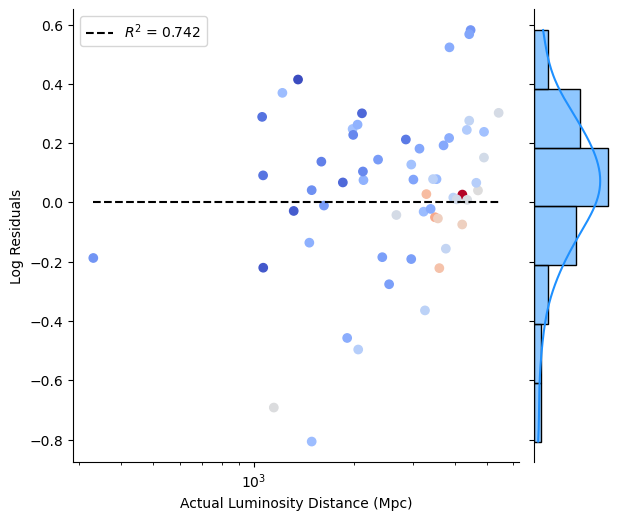

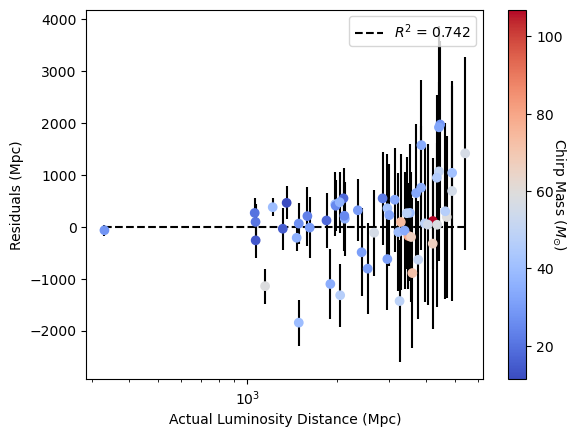

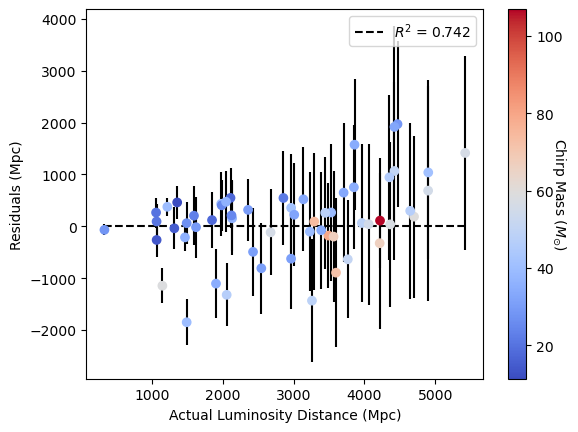

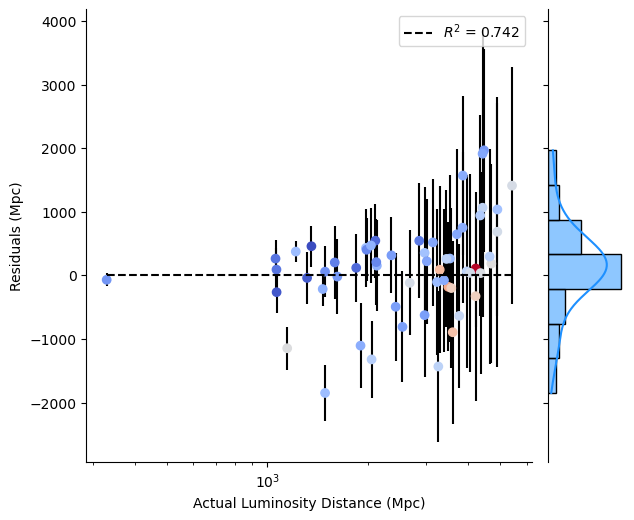

In [84]:
prediction_plots("chirp_mass", "Chirp Mass ($M_{\odot}$)", plt.colormaps["coolwarm"])

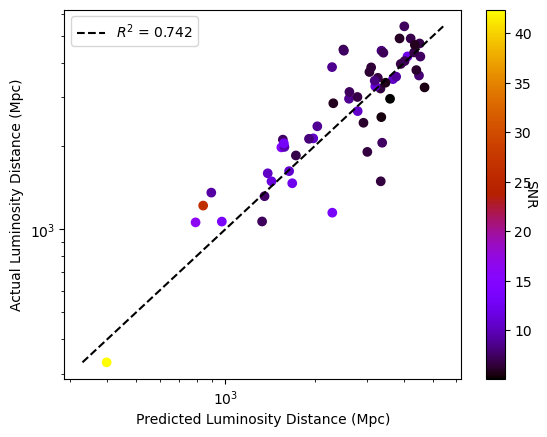

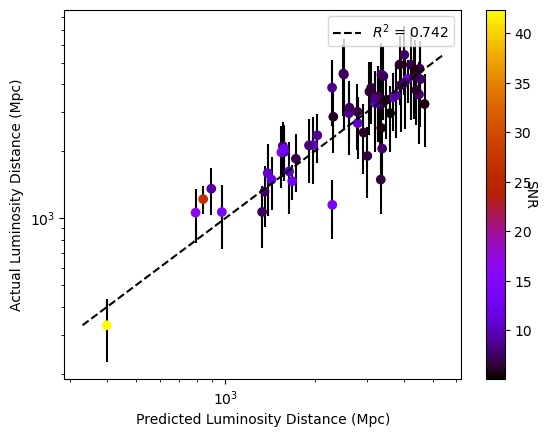

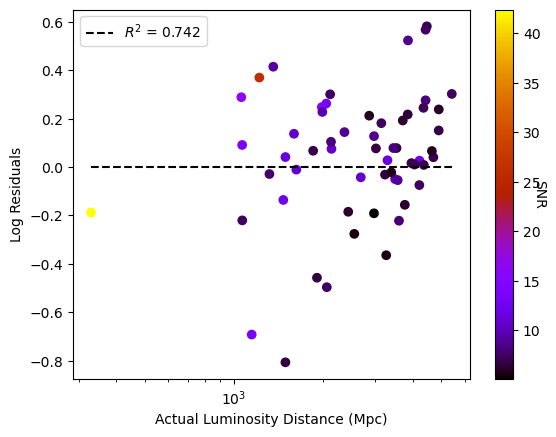

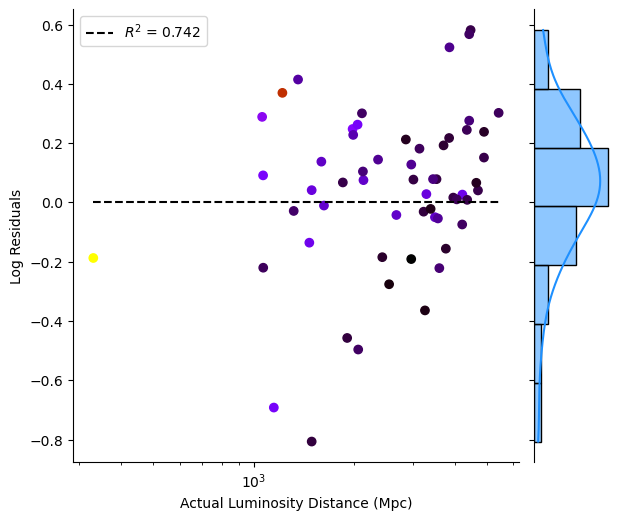

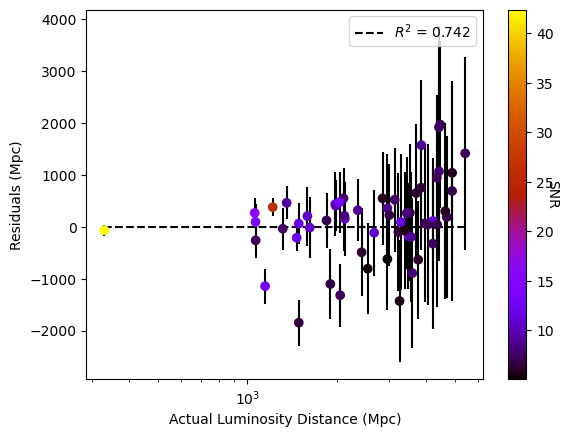

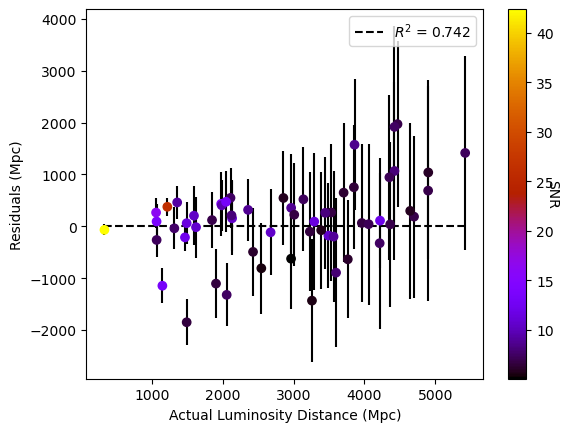

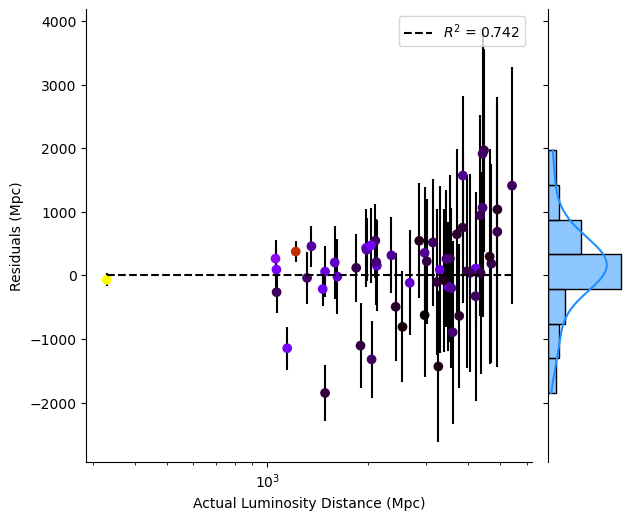

In [85]:
prediction_plots("snr", "SNR", plt.colormaps["gnuplot"])